In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Load the data
data_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'NSL_regular_season_data_2.csv')
print(data_path)
data = pd.read_csv(data_path)

/workspaces/Wharton-HS-Competition-Soccer-Playoff-Predictions/data/NSL_regular_season_data_2.csv


In [2]:
# Visualize the data
data

,game_id,HomeTeam,AwayTeam,HomeScore,AwayScore,Home_xG,Away_xG,Home_shots,Away_shots,Home_corner,Away_corner,Home_PK_Goal,Away_PK_Goal,Home_PK_shots,Away_PK_shots,Home_ToP
0,game_2023_94,TUC,ALB,1,3,2.52,2.00,13,15,3,4,0,0,1,0,0.53
1,game_2023_341,MOB,ALB,3,1,0.46,0.99,11,8,3,6,0,0,0,0,0.56
2,game_2023_442,CHM,ALB,0,1,1.62,1.16,16,13,1,7,0,0,0,0,0.52
3,game_2023_50,SAS,ALB,2,1,1.53,0.55,20,2,6,1,0,0,0,0,0.49
4,game_2023_389,FOR,ALB,0,2,2.15,1.13,18,13,2,0,0,0,0,0,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,game_2023_81,TUC,WIC,2,1,2.72,0.38,16,8,8,2,0,0,0,0,0.33
472,game_2023_36,DOV,WIC,0,2,1.11,1.34,9,13,7,4,0,0,0,0,0.31
473,game_2023_269,SFS,WIC,1,1,2.84,0.30,26,2,8,6,0,0,0,0,0.54
474,game_2023_298,ALB,WIC,2,3,2.61,2.09,12,17,7,4,0,0,0,0,0.43


In [3]:
# Create a new column called 'Winner' that contains 1 if team wins, 0 if team loses
data['Winner'] = data['HomeScore'] > data['AwayScore']

# Create a date column from the matches.
data['GameNumber'] = data['game_id'].str.split('_', expand=True)[2]
data['GameNumber'] = data['GameNumber'].astype(int)
data.drop('game_id', axis=1, inplace=True)
data.sort_values(by='GameNumber', inplace=True)

# Drop the 'HomeScore' and 'AwayScore' columns
data = data.drop(['HomeScore', 'AwayScore'], axis=1)

In [4]:
# Visualize the mean and spread of the data
data.describe()

,Home_xG,Away_xG,Home_shots,Away_shots,Home_corner,Away_corner,Home_PK_Goal,Away_PK_Goal,Home_PK_shots,Away_PK_shots,Home_ToP,GameNumber
count,476.000000,476.000000,476.000000,476.00000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
mean,1.612752,0.997605,15.178571,11.10084,5.401261,4.266807,0.042017,0.018908,0.264706,0.111345,0.518004,238.500000
std,0.717091,0.526305,5.487176,4.51644,2.766856,2.248328,0.211061,0.150996,0.508138,0.346710,0.085601,137.553626
min,0.200000,0.060000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.280000,1.000000
25%,1.110000,0.590000,12.000000,8.00000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.450000,119.750000
50%,1.540000,0.970000,15.000000,11.00000,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.530000,238.500000
75%,2.102500,1.320000,19.000000,14.00000,7.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.570000,357.250000
max,4.030000,2.630000,30.000000,23.00000,16.000000,11.000000,2.000000,2.000000,2.000000,2.000000,0.770000,476.000000


In [5]:
# Split the data into a feature matrix and a target vector
X = data
y = data['Winner']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [6]:
from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()
s.setup(X_train, target = 'Winner', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Winner
2,Target type,Binary
3,Original data shape,"(357, 15)"
4,Transformed data shape,"(357, 15)"
5,Transformed train set shape,"(249, 15)"
6,Transformed test set shape,"(108, 15)"
7,Numeric features,12
8,Categorical features,2
9,Preprocess,True


In [7]:
best = s.compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:21:31
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.6943,0.0000,0.5033,0.6792,0.5601,0.3336,0.3543,0.0670
lr,Logistic Regression,0.6905,0.7368,0.4922,0.6674,0.5451,0.3203,0.3407,0.4520
lightgbm,Light Gradient Boosting Machine,0.6590,0.6190,0.4978,0.6021,0.5349,0.2693,0.2792,0.4310
lda,Linear Discriminant Analysis,0.6543,0.6495,0.4833,0.6239,0.5259,0.2582,0.2772,0.0720
rf,Random Forest Classifier,0.6467,0.6541,0.4222,0.6144,0.4747,0.2224,0.2446,0.2050
ada,Ada Boost Classifier,0.6265,0.6676,0.4844,0.5529,0.5003,0.2076,0.2170,0.1300
et,Extra Trees Classifier,0.6227,0.6124,0.3911,0.5617,0.4475,0.1713,0.1877,0.1940
gbc,Gradient Boosting Classifier,0.6147,0.6543,0.4656,0.5313,0.4835,0.1802,0.1877,0.1390
knn,K Neighbors Classifier,0.6107,0.5713,0.3889,0.5209,0.4339,0.1475,0.1567,0.0680
dummy,Dummy Classifier,0.6105,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0550


In [8]:
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

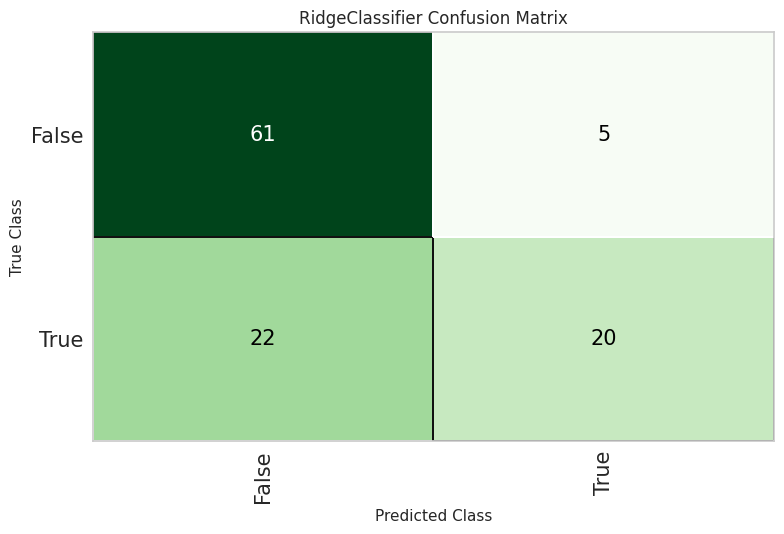

In [9]:
s.plot_model(best, plot = 'confusion_matrix')

In [10]:
s.predict_model(best)

,HomeTeam,AwayTeam,Home_xG,Away_xG,Home_shots,Away_shots,Home_corner,Away_corner,Home_PK_Goal,Away_PK_Goal,Home_PK_shots,Away_PK_shots,Home_ToP,GameNumber,Winner,prediction_label
418,EUG,TAC,1.52,2.57,15,20,5,8,0,0,0,0,0.48,71,False,0
375,TAC,SJU,2.10,0.36,13,15,6,7,0,0,0,0,0.59,422,True,1
308,AUG,PRO,1.72,1.15,18,11,7,2,2,0,2,1,0.46,292,True,1
403,LAR,SPR,1.17,1.51,16,13,11,2,0,0,1,0,0.66,68,False,0
155,OAK,FAR,0.23,1.02,13,10,7,6,0,0,1,0,0.50,282,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,SAS,FOR,2.22,0.36,18,10,5,5,0,0,2,0,0.49,273,True,1
218,LRO,LAR,1.03,1.66,7,12,3,5,0,0,1,0,0.57,153,False,0
317,LEX,PRO,1.14,0.58,12,8,5,6,0,0,0,0,0.49,44,False,0
296,DES,OAK,0.68,0.40,6,4,0,2,0,0,0,0,0.60,257,True,0


In [11]:
predictions = s.predict_model(best, data=X_test, raw_score=True)
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.6471,0.5957,0.3696,0.5667,0.4474,0.2046,0.2147


,HomeTeam,AwayTeam,Home_xG,Away_xG,Home_shots,Away_shots,Home_corner,Away_corner,Home_PK_Goal,Away_PK_Goal,Home_PK_shots,Away_PK_shots,Home_ToP,GameNumber,Winner,prediction_label
249,SFS,LRO,2.17,0.72,18,10,8,7,0,0,0,0,0.49,299,False,1
75,LRO,BOI,1.40,0.99,18,9,5,2,0,0,1,1,0.53,267,False,0
323,ALB,REN,1.72,0.97,8,3,4,4,0,0,1,0,0.49,368,True,0
414,WIC,TAC,1.46,1.23,11,11,6,4,0,0,0,0,0.63,176,True,0
178,LRO,FOR,1.82,0.68,13,8,7,2,0,0,0,0,0.62,251,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,BAK,FAR,0.25,1.59,17,8,7,3,0,0,0,0,0.46,423,False,0
152,ALB,EUG,1.04,0.75,11,11,1,2,0,0,0,0,0.65,286,False,0
369,EUG,SFS,1.12,0.89,17,10,8,1,0,0,0,0,0.32,426,True,0
407,DOV,SPR,2.74,1.95,20,14,6,5,0,0,0,0,0.60,149,False,0


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

<AxesSubplot: >

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

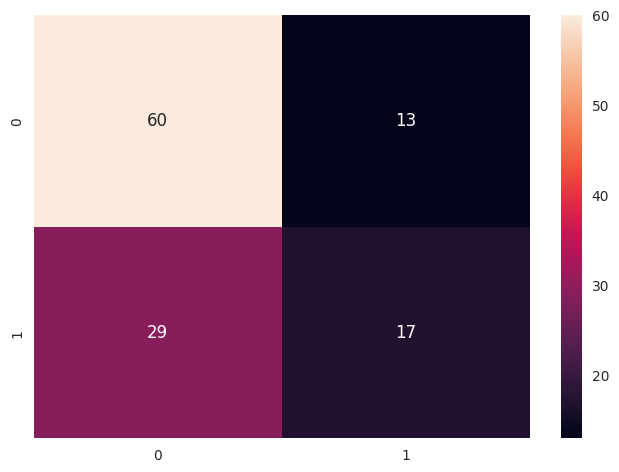

In [12]:
# Show confusion matrix for predictions
conf_matrix = confusion_matrix(predictions['Winner'], predictions['prediction_label'])
sns.heatmap(conf_matrix, annot=True)

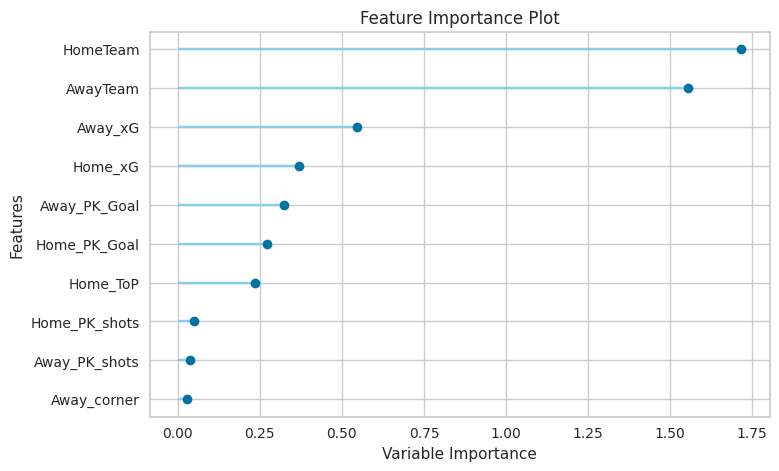

In [13]:
# Try to view feature importances for the model if applicable
try:
    s.plot_model(best, plot = 'feature')
except:
    print('Feature importances not available for this model')

In [14]:
try:
    s.plot_model(best, plot = 'auc')
except:
    print('AUC not available for this model')

AUC not available for this model


In [15]:
s.save_model(best, 'best_pycaret_whole_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Home_xG', 'Away_xG', 'Home_shots',
                                              'Away_shots', 'Home_corner',
                                              'Away_corner', 'Home_PK_Goal',
                                              'Away_PK_Goal', 'Home_PK_shots',
                                              'Away_PK_shots', 'Home_ToP',
                                              'GameNumber'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty...
                                     transformer=TargetEncoder(cols=['HomeTeam',
                         